In [5]:
import ising_efficient

import jax.numpy as jnp
import jax.random as jrnd
import numpy as np
import matplotlib.pyplot as plt

from collections import deque

from sparse_adj_mat import Sparse_Adjacency_Matrix
from network_generation import generate_erdos_renyi_sparse_adjacency_matrix
from network_generation import generate_scale_free_sparse_adjacency_matrix_jax
from network_generation import generate_small_world_sparse_adjacency_matrix_jax

from clustering_coefficient import approx_global_coefficients_over_time
from clustering_coefficient import get_local_coefficients_over_time

In [6]:
# preparing comparable parameters
N = 100
weight_range=(-0.04, 0.2) # weight range changed from (-1,1.0) to (-0.1, 0.2) - individuals within the network tend to agree with their neighbours 
avg_deg = 20
seed = 1
n_steps = 300

# cluster analysis parameters
interval = 10
trials = 50

#edge_total = num_nodes*avg_deg / 2 #edges

#Erdos_Renyi
edge_prob = avg_deg/(N-1) 

#Scale free - Albert Barab'asi 
new_edges = avg_deg//2 #avg_deg ~ 2m

#small world
k_neighbours = avg_deg #k neighbours per node
rewire_prob = 0.1  #rewiring probability



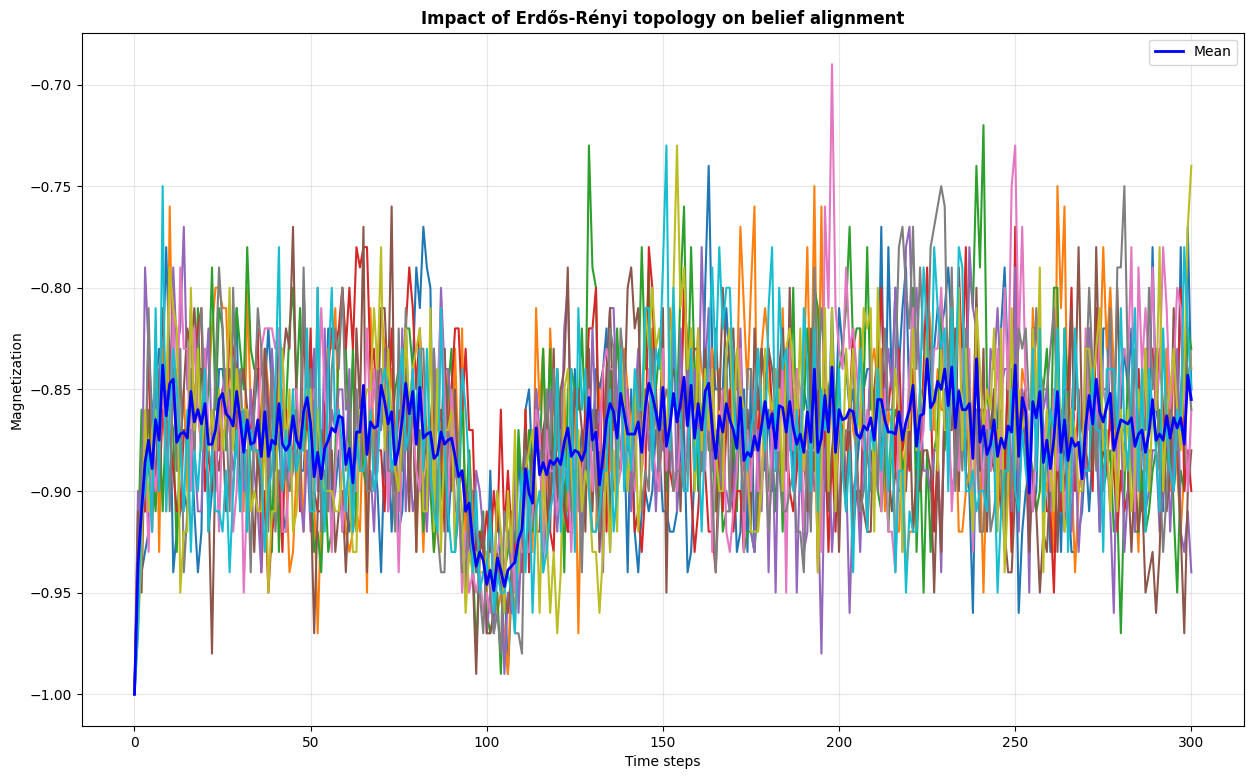

In [8]:
#Erdos-Renyi
adj_mat = generate_erdos_renyi_sparse_adjacency_matrix(
    num_nodes=N, edge_prob=edge_prob, weight_range=weight_range
)

# negative intitialisation:
ones_init = -jnp.ones(shape=(len(adj_mat),)).astype(int)

#External field
alpha = 100 #time of the peak
gamma = 5 #width of the peak
external_field = lambda t, node_idx: -10 * ((node_idx[0] / len(adj_mat)) < l) * (jnp.exp(-((t-alpha) / gamma)**2))

#lambda - fraction of people being exposed to the dynamic field
l = 0.4 # % get the field

µ = 0.9 #memory coefficient
beta = 1.0 #temperature

erdos_results = []
mags = []
for i in range(10):
    network = ising_efficient.BeliefNetwork(
        sparse_adj=adj_mat,
        #external_field=lambda t, node_idx: jnp.sin(t * 0.1),
        #external_field=lambda t, node_idx: ((node_idx[0] / len(adj_mat)) < l) * jnp.sin(t * 0.1),
        external_field=external_field,
        init_state=ones_init, #np.copy(random_init), #or 
        µ=µ,
        beta=1.1,
    )
    result = network.run_for_steps(n_steps, seed=i)
    erdos_results.append(np.copy(result))
    magnetization_erdos = np.mean(result, axis=1)
    mags.append(np.copy(magnetization_erdos))
    
mags_array = np.array(mags)

plt.figure(figsize=(15,9))
for m in mags_array: 
    plt.plot(m)
mean_erdos = np.mean(mags_array, axis = 0)
plt.plot(mean_erdos, color ='blue',linewidth=2.0, label="Mean")
#plt.plot(np.min(mags_array, axis = 0), color = 'red')
#plt.plot(np.max(mags_array, axis = 0))
plt.xlabel("Time steps")
plt.ylabel("Magnetization")
plt.title("Impact of Erdős-Rényi topology on belief alignment", weight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('results/Erdos.png')
plt.show()



In [ ]:
glob_coeffs = []
# for all_states in erdos_results:
#     glob_coeffs.append(get_local_coefficients_over_time(
#         sparse_adj=adj_mat,
#         states=all_states,
#         interval=1,
#         trials=200
#     ))
for all_states in erdos_results[0:1]:
    res = get_local_coefficients_over_time(
        sparse_adj = adj_mat,
        states = all_states,
        interval = 100
    )
    glob_coeffs.append(res)
    
print([len(epoch) for epoch in glob_coeffs])
exit(0)
# for epoch in glob_coeffs:
#     plt.plot(list(epoch.keys()), list(epoch.values()))
# plt.xlabel("Time steps")
# plt.ylabel("Global Clustering Coefficient")
# plt.title("Global Clustering Coefficient over time - Erdős-Rényi", weight='bold')
# plt.grid(True, alpha=0.3)
# plt.show()
# print(glob_coeffs[0].keys())

# mean_erdos = np.mean(mags_array, axis = 0)
# plt.plot(mean_erdos, color ='blue',linewidth=2.0, label="Mean")
# #plt.plot(np.min(mags_array, axis = 0), color = 'red')
# #plt.plot(np.max(mags_array, axis = 0))
# plt.xlabel("Time steps")
# plt.ylabel("Magnetization")
# plt.title("Impact of Erdős-Rényi topology on belief alignment", weight='bold')
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.savefig('results/Erdos.png')
# plt.show()

[4]


: 

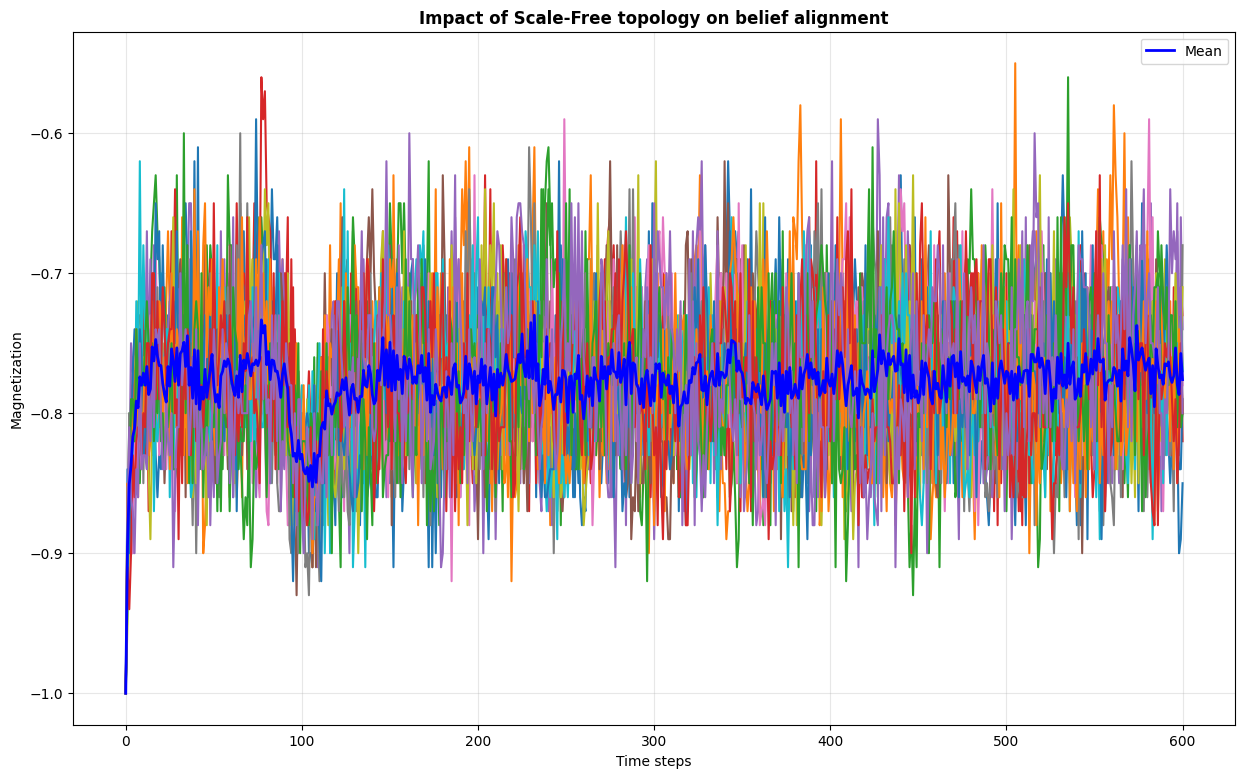

: 

In [ ]:
#Scale-Free
adj_mat = generate_scale_free_sparse_adjacency_matrix_jax(
    num_nodes=N, num_edge= new_edges, weight_range=weight_range
)

#Initialisation
random_init = jrnd.randint(
    shape=(len(adj_mat),),
    minval=-1,
    maxval=2,
    key=jrnd.PRNGKey(np.random.randint(low=0, high=100000)),
)
#alternative intitialisation:
#ones_init = jnp.ones(shape=(len(adj_mat),)).astype(int)


#External field
alpha = 100 #time of the peak
gamma = 5 #width of the peak
external_field = lambda t, node_idx: -10 * ((node_idx[0] / len(adj_mat)) < l) * (jnp.exp(-((t-alpha) / gamma)**2))

#lambda - fraction of people being exposed to the dynamic field
l = 0.4 # % get the field

µ = 0.9 #memory coefficient
beta = 1.0 #temperature

mags = []
for i in range(15):
    network = ising_efficient.BeliefNetwork(
        sparse_adj=adj_mat,
        #external_field=lambda t, node_idx: jnp.sin(t * 0.1),
        #external_field=lambda t, node_idx: ((node_idx[0] / len(adj_mat)) < l) * jnp.sin(t * 0.1),
        external_field=external_field,
        init_state= ones_init, #np.copy(random_init), #or
        µ=µ,
        beta=beta,
    )
    result = network.run_for_steps(n_steps, seed=i)
    magnetization_erdos = np.mean(result, axis=1)
    mags.append(np.copy(magnetization_erdos))
    
mags_array = np.array(mags)

plt.figure(figsize=(15,9))
for m in mags_array: 
    plt.plot(m)
mean_scale = np.mean(mags_array, axis = 0)
plt.plot(mean_scale, color ='blue',linewidth=2.0, label="Mean")
#plt.plot(np.min(mags_array, axis = 0), color = 'red')
#plt.plot(np.max(mags_array, axis = 0))
plt.xlabel("Time steps")
plt.ylabel("Magnetization")
plt.title("Impact of Scale-Free topology on belief alignment", weight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('results/Scale.png')
plt.show()

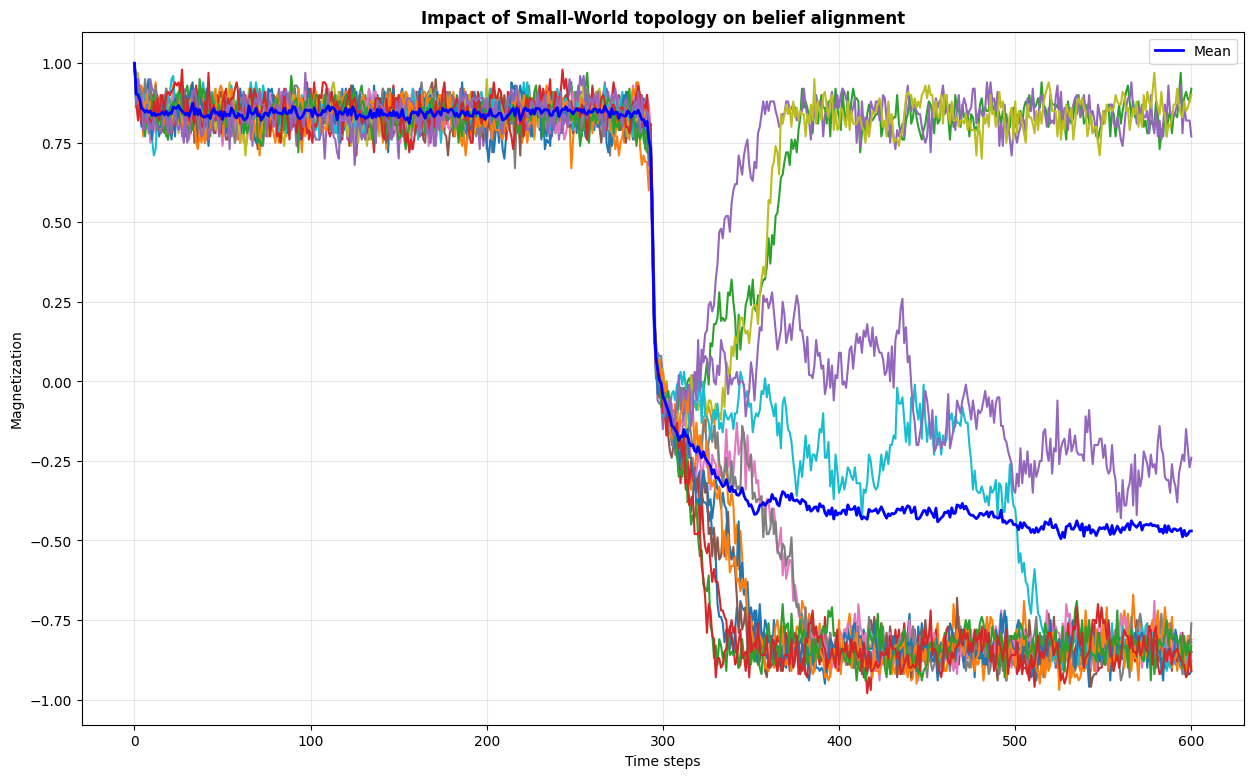

In [ ]:

#Small-World
adj_mat = generate_small_world_sparse_adjacency_matrix_jax(
    num_nodes=N, k=k_neighbours, p=rewire_prob, weight_range=weight_range
)
#Initialisation
random_init = jrnd.randint(
    shape=(len(adj_mat),),
    minval=-1,
    maxval=2,
    key=jrnd.PRNGKey(np.random.randint(low=0, high=100000)),
)
#alternative intitialisation:
ones_init = jnp.ones(shape=(len(adj_mat),)).astype(int)


#External field
alpha = 300 #time of the peak
gamma = 5 #width of the peak
external_field = lambda t, node_idx: -10 * ((node_idx[0] / len(adj_mat)) < l) * (jnp.exp(-((t-alpha) / gamma)**2))

#lambda - fraction of people being exposed to the dynamic field
l = 0.4 # % get the field

µ = 0.9 #memory coefficient
beta = 1.0 #temperature

mags = []
for i in range(15):
    network = ising_efficient.BeliefNetwork(
        sparse_adj=adj_mat,
        #external_field=lambda t, node_idx: jnp.sin(t * 0.1),
        #external_field=lambda t, node_idx: ((node_idx[0] / len(adj_mat)) < l) * jnp.sin(t * 0.1),
        external_field=external_field,
        init_state=ones_init, #np.copy(random_init), #or 
        µ=µ,
        beta=beta,
    )
    result = network.run_for_steps(n_steps, seed=i)
    magnetization_erdos = np.mean(result, axis=1)
    mags.append(np.copy(magnetization_erdos))
    
mags_array = np.array(mags)

plt.figure(figsize=(15,9))
for m in mags_array: 
    plt.plot(m)
mean_small = np.mean(mags_array, axis = 0)
plt.plot(mean_small, color ='blue',linewidth=2.0, label="Mean")
#plt.plot(np.min(mags_array, axis = 0), color = 'red')
#plt.plot(np.max(mags_array, axis = 0))
plt.xlabel("Time steps")
plt.ylabel("Magnetization")
plt.title("Impact of Small-World topology on belief alignment", weight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('results/Small.png')
plt.show()

